In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [3]:
df_raw = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/HMEQ.csv', engine='python')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [6]:
df_raw.isnull().sum(axis=0)

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB          0
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [7]:
df_raw['JOB'].fillna('Other', inplace=True)
df_raw.fillna(df_raw.mean(), inplace=True)

In [9]:
# 더미변수 생성
# get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성
df_raw_dummy = pd.get_dummies(df_raw)
# 더미변수 생성도니 데이터의 상위 5개 row를 확인
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [11]:
# 설명변수, 목표변수 나눌것
df_raw_x = df_raw_dummy.drop('BAD', axis=1, inplace=False)
df_raw_y = df_raw_dummy['BAD']

# train_test_split
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

In [14]:
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# train 데이터 정확도
print("Accuracy on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test 데이터 정확도
print("Accuracy on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set : 1.000
Accuracy on test set : 0.932


In [15]:
tree_uncustomized

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [16]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy

In [17]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


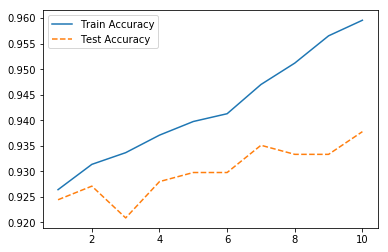

In [18]:
plt.plot(para_depth, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_depth, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

In [19]:
# 변수명 저장
v_feature_name = df_train_x.columns

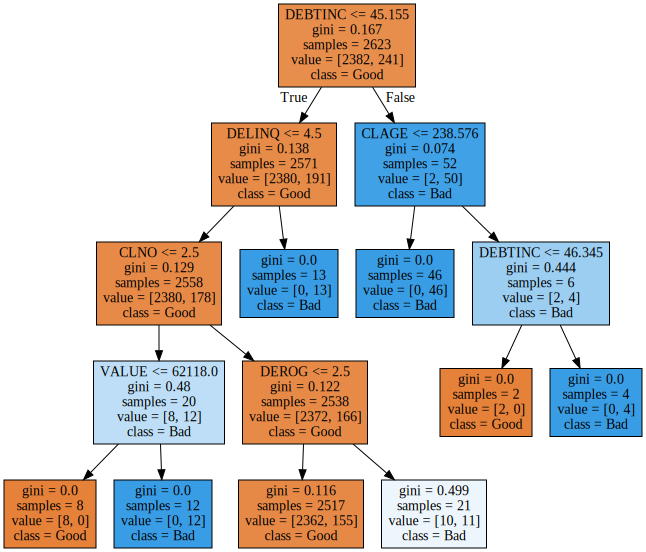

In [21]:
# 깊이가 4인 모델
tree_low = DecisionTreeClassifier(max_depth=4, random_state=1234)
tree_low.fit(df_train_x, df_train_y)
# 트리 모델을 tree_low.dot 파일로 저장 (목표변수 : 0 = Good, 1 = Bad)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
                feature_names=v_feature_name, impurity=True, filled=True)
# graphviz를 이용해 트리 모델 시각화
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

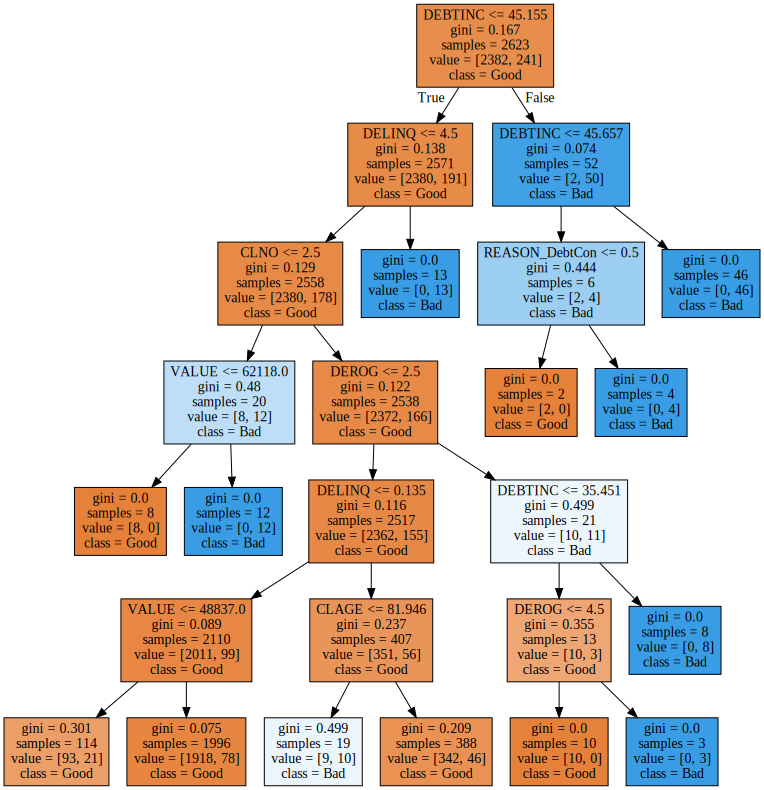

In [22]:
# 깊이가 6인 모델
tree_low = DecisionTreeClassifier(max_depth=6, random_state=1234)
tree_low.fit(df_train_x, df_train_y)
# 트리 모델을 tree_low.dot 파일로 저장 (목표변수 : 0 = Good, 1 = Bad)
export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
                feature_names=v_feature_name, impurity=True, filled=True)
# graphviz를 이용해 트리 모델 시각화
with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [25]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# min_samples_split : 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split * 10 for n_split in range(1, 11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split['MinSamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy

In [26]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.936,0.928
1,20,0.936,0.928
2,30,0.933,0.921
3,40,0.933,0.921
4,50,0.933,0.921
5,60,0.933,0.921
6,70,0.933,0.921
7,80,0.933,0.921
8,90,0.933,0.921
9,100,0.933,0.921


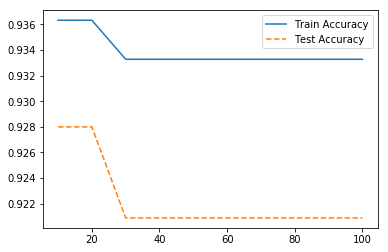

In [27]:
plt.plot(para_split, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_split, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

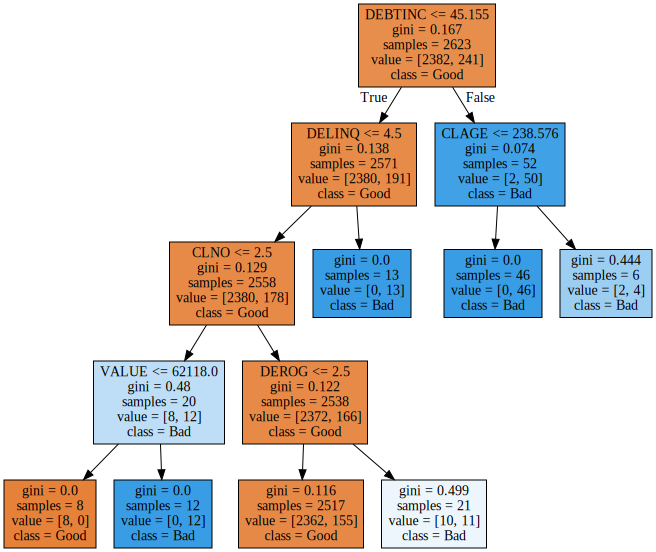

In [28]:
# 분리 노드의 최소 자료 수가 20인 모델
tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=20, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
                feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

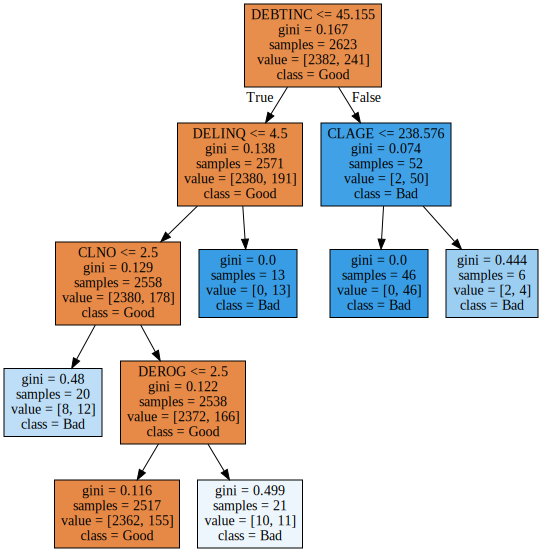

In [35]:
# 분리 노드의 최소 자료 수가 30인 모델
tree_high = DecisionTreeClassifier(max_depth=4, min_samples_split=30, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file='tree_high.dot', class_names=['Good', 'Bad'],
                feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [30]:
# train 및 test 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
# min_samples_leaf : 잎사귀 노드 최소 자료 수 제한
para_leaf = [n_leaf * 2 for n_leaf in range(1, 11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split = 20,\
                                  max_depth = 4, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
# 데이터 테이블로 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['MinSamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy

In [31]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.936,0.928
1,4,0.936,0.928
2,6,0.936,0.928
3,8,0.936,0.928
4,10,0.936,0.928
5,12,0.933,0.921
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


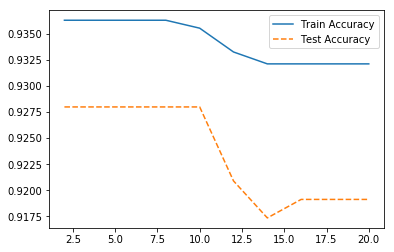

In [32]:
plt.plot(para_leaf, train_accuracy, linestyle='-', label='Train Accuracy')
plt.plot(para_leaf, test_accuracy, linestyle='--', label='Test Accuracy')
plt.legend()

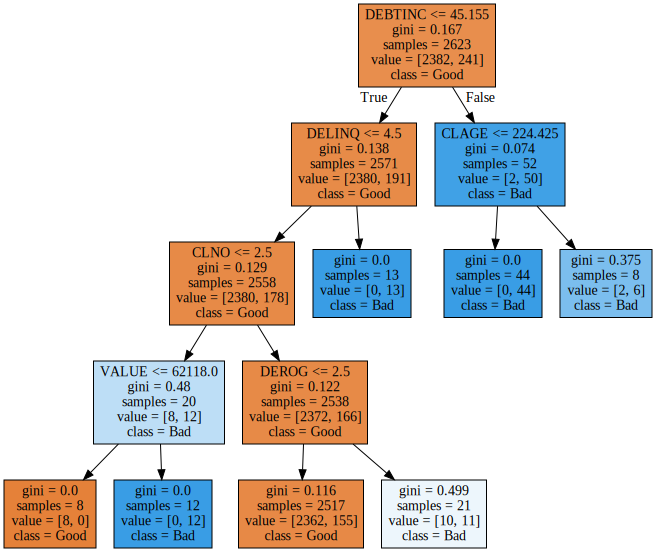

In [33]:
# 잎사귀의 최소 자료 수가 8인 모델
tree_low = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=8, random_state=1234)
tree_low.fit(df_train_x, df_train_y)

export_graphviz(tree_low, out_file='tree_low.dot', class_names=['Good', 'Bad'],
                feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_low.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

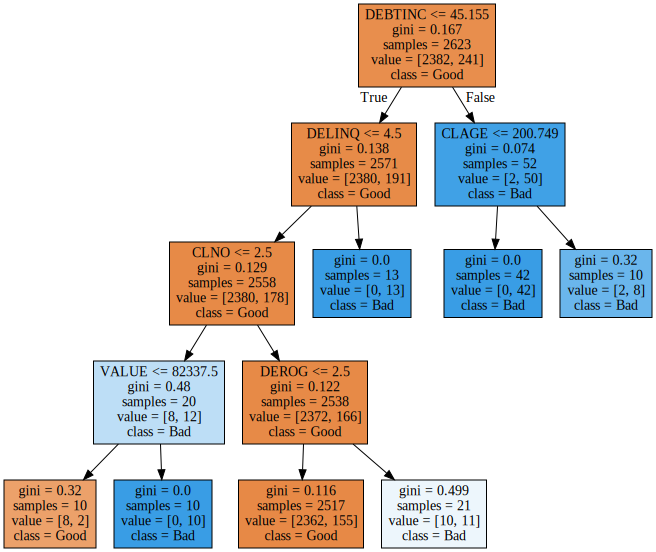

In [34]:
# 잎사귀의 최소 자료수가 10인 모델
tree_high = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=10, random_state=1234)
tree_high.fit(df_train_x, df_train_y)

export_graphviz(tree_high, out_file='tree_high.dot', class_names=['Good', 'Bad'],
                feature_names=v_feature_name, impurity=True, filled=True)

with open('tree_high.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [36]:
tree_final = DecisionTreeClassifier(max_depth=4, min_samples_split=20, min_samples_leaf=8, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

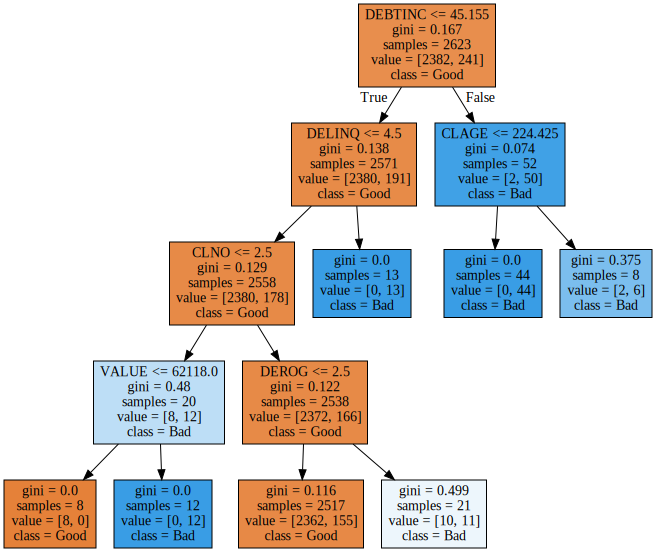

In [37]:
# 최종 모델 시각화
# tree_final.dot 으로 결과 저장
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['Good', 'Bad'],
               feature_names=v_feature_name, impurity=True, filled=True)
# tree_final.dot 그리기
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [39]:
# 최종 모델 평가
y_pred = tree_final.predict(df_test_x)
print("Accuracy : {0:.3f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion matrix : \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy : 0.928

Confusion matrix : 
[[1015    6]
 [  75   29]]


In [40]:
# 결론도출
# tree.feature_importance_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.602
5,DELINQ,0.168
8,CLNO,0.085
2,VALUE,0.072
4,DEROG,0.067
6,CLAGE,0.006
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000


Text(0, 0.5, '설명변수')

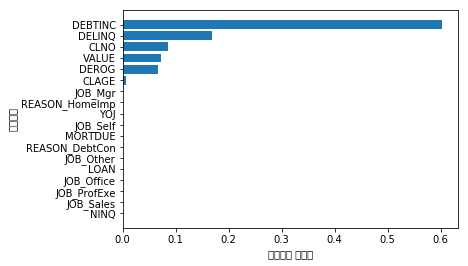

In [42]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width= df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')

# 숙제

## 실습

In [57]:
df_tele = pd.read_csv('/home/pirl/Desktop/Statistics/Big Data Analyze/통신고객이탈.csv', engine='python')
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [58]:
df_tele.isnull().sum(axis=0)

CHURN                 0
CUSTOMER_ID           0
GENDER                0
AGE                   0
CHARGE_TYPE           0
HANDSET               0
USAGE_BAND            0
SERVICE_DURATION      0
DROPPED_CALLS         0
PEAK_CALLS_NO         0
PEAK_CALLS_TIME       0
WEEKEND_CALLS_NO      0
WEEKEND_CALLS_TIME    0
TOTAL_CALLS_NO        0
TOTAL_CALLS_TIME      0
dtype: int64

In [59]:
# 명목형 변수들의 distinct한 값의 수
obj_cols = df_tele.select_dtypes('object').columns
for col in obj_cols:
    _n = len(df_tele[col].value_counts())
    print(col, " : ", str(_n))

CHURN  :  2
CUSTOMER_ID  :  930
GENDER  :  2
CHARGE_TYPE  :  5
HANDSET  :  11
USAGE_BAND  :  6


In [60]:
# CHURN 변수 데이터 전처리
df_tele['CHURN'] = np.where(df_tele['CHURN'] == 'Active', 0, 1)
df_tele.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,0,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,0,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,0,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,0,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,0,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [61]:
df_tele.drop('CUSTOMER_ID', axis=1, inplace=True)

In [62]:
# get_dummies : 데이터의 문자형 변수에 대한 더미변수 생성
df_tele_dummy = pd.get_dummies(df_tele)
# 더미변수 생성도니 데이터의 상위 5개 row를 확인
df_tele_dummy.head()

,CHURN,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,31,33.33,6,218,379.8,9,21.6,366,632.4,...,0,0,0,0,0,0,1,0,0,0
1,0,27,30.87,10,373,656.4,11,28.0,411,810.4,...,0,0,0,0,0,0,1,0,0,0
2,0,27,49.40,11,260,582.0,0,0.0,265,614.1,...,0,0,0,0,0,0,1,0,0,0
3,0,61,48.60,1,294,661.8,14,101.5,326,844.0,...,0,0,0,0,0,0,1,0,0,0
4,0,52,56.03,0,221,555.6,7,25.0,274,673.0,...,0,0,0,0,0,0,1,0,0,0


In [66]:
# 설명변수, 목표변수 나눌것
df_tele_x = df_tele_dummy.drop('CHURN', axis=1, inplace=False)
df_tele_y = df_tele_dummy['CHURN']

# train_test_split
dft_train_x, dft_test_x, dft_train_y, dft_test_y = train_test_split(df_tele_x, df_tele_y, test_size=0.3, random_state=1234)

In [69]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeClassifier()
# 구하고자 하는 paramteter의 범위
param_grid = {'max_depth' : para_depth, 'min_samples_split' : para_split,
             'min_samples_leaf' : para_leaf}
# 정확도가 높은 최적 parameter 찾기
grid_dt = GridSearchCV(estimator, param_grid, scoring='accuracy', n_jobs=-1)
grid_dt.fit(dft_train_x, dft_train_y)

print('best estimator model : \n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter : \n{}'.format(grid_dt.best_params_))
print('\nbest score : \n{}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model : 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

best parameter : 
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 20}

best score : 
0.899


#### GridSearch를 통해 의사결정나무의 최적 파라미터는 최대 깊이가 5이고, 분리 노드의 최소 자료 수는 20이며 잎사귀 노드의 최소 자료수는 2이다.
#### GridSearch를 통해 찾은 파라미터로 모델과 트리를 생성한다.

In [70]:
tree_final = DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=2, random_state=1234)
tree_final.fit(dft_train_x, dft_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [72]:
# 변수명 저장
v_feature_name = dft_train_x.columns

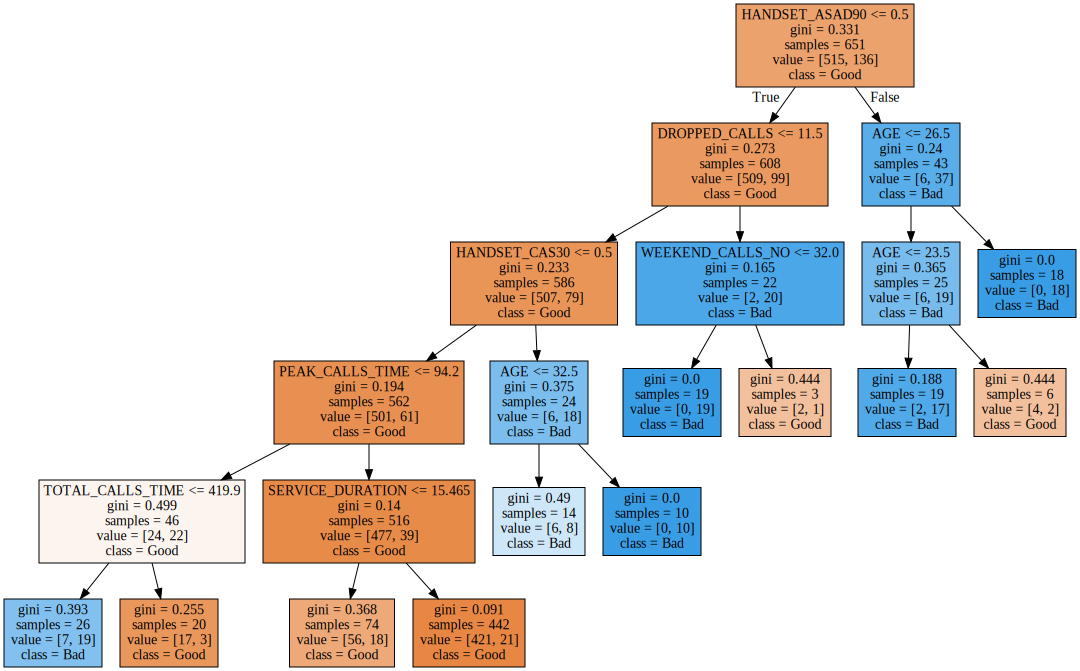

In [73]:
# 최종 모델 시각화
# tree_final.dot 으로 결과 저장
export_graphviz(tree_final, out_file='tree_final.dot', class_names=['Good', 'Bad'],
               feature_names=v_feature_name, impurity=True, filled=True)
# tree_final.dot 그리기
with open('tree_final.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### GridSearch를 통해 찾은 최적 파라미터로 만든 모델의 정분류율은 90.7%이며 정분류율이 꽤 높은편에 속하므로 사용하기 적절하다고 생각한다.
#### 설명변수의 중요도를 그래프로 표시하였다

In [74]:
# 최종 모델 평가
y_pred = tree_final.predict(dft_test_x)
print("Accuracy : {0:.3f}\n".format(tree_final.score(dft_test_x, dft_test_y)))
print("Confusion matrix : \n{}".format(confusion_matrix(dft_test_y, y_pred)))

Accuracy : 0.907

Confusion matrix : 
[[224  11]
 [ 15  29]]


In [75]:
# 결론도출
# tree.feature_importance_ 로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도 순으로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
17,HANDSET_ASAD90,0.331
2,DROPPED_CALLS,0.215
20,HANDSET_CAS30,0.160
4,PEAK_CALLS_TIME,0.116
8,TOTAL_CALLS_TIME,0.065
0,AGE,0.053
1,SERVICE_DURATION,0.041
5,WEEKEND_CALLS_NO,0.019
25,HANDSET_SOP20,0.000
22,HANDSET_S50,0.000


Text(0, 0.5, '설명변수')

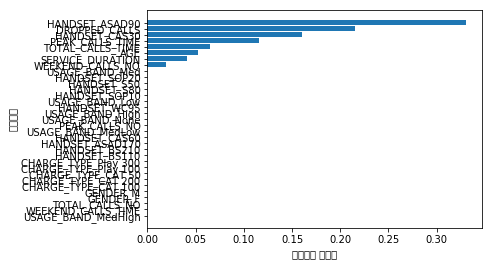

In [76]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width= df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')